In [117]:
import pandas as pd

data_dir = "data/processed/"

df_election_totals = pd.read_csv(data_dir + "election_totals.csv")
df_election_totals.set_index("year", inplace=True)

df_registration_voted_totals = pd.read_csv(data_dir + "registration_voted_totals.csv")
df_registration_voted_totals.set_index("year", inplace=True)

df_registration_totals = pd.read_csv(data_dir + "registration_totals.csv")
df_registration_totals.set_index("year", inplace=True)

df_precincts_over_time = pd.read_csv(data_dir + "precincts_with_registration.csv")
df_precincts_over_time.drop("Unnamed: 0", axis=1, inplace=True)

<AxesSubplot:xlabel='year'>

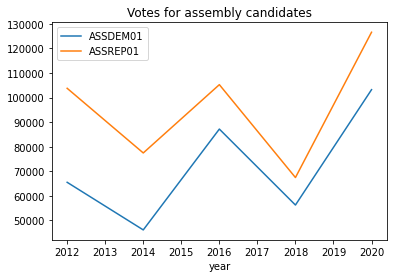

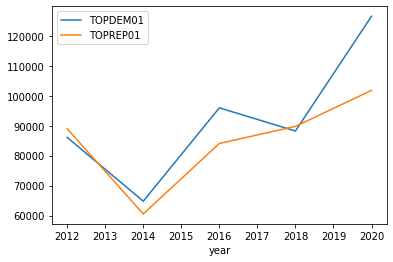

In [126]:
df_election_totals[["ASSDEM01", "ASSREP01"]].plot.line(title = "Votes for assembly candidates")

df_election_totals[["TOPDEM01", "TOPREP01"]].plot.line()

<AxesSubplot:title={'center':'Number of Votes Cast by Registered Party'}, xlabel='year'>

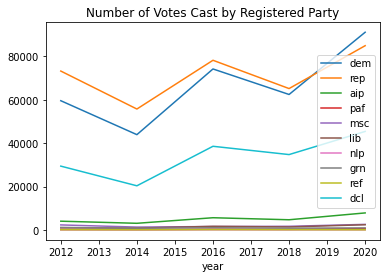

In [119]:
df_registration_voted_totals[["dem","rep","aip","paf","msc","lib","nlp","grn","ref","dcl"]].plot.line(title = "Number of Votes Cast by Registered Party")

<AxesSubplot:title={'center':'Registration Totals by Party'}, xlabel='year'>

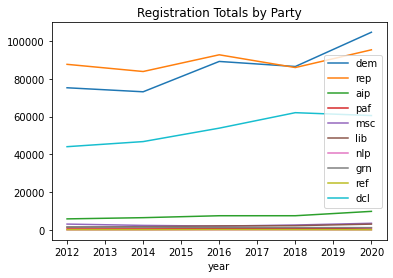

In [120]:
df_registration_totals[["dem","rep","aip","paf","msc","lib","nlp","grn","ref","dcl"]].plot.line(title = "Registration Totals by Party")

<AxesSubplot:xlabel='year'>

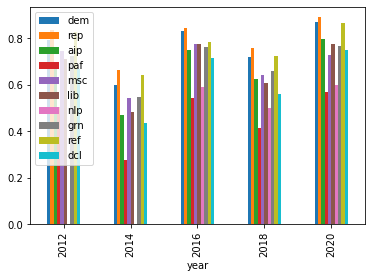

In [121]:
df_voter_turnout = df_registration_voted_totals / df_registration_totals
df_voter_turnout[["dem","rep","aip","paf","msc","lib","nlp","grn","ref","dcl"]].plot.bar()

## Observing Precinct Level Voting Trends

In [122]:
def determine_top_ballot_dem_perc(prec):
    top_race = "GOV" if str(int(prec["year"])) in ["2014", "2018"] else "PRS"
    return prec["{}DEM01".format(top_race)] / (prec["{}DEM01".format(top_race)] + prec["{}REP01".format(top_race)])

# Make new columns representing the proprotion of votes cast in assembly race for either candidate.
df_precincts_over_time["ASSDEMPERC"] = df_precincts_over_time["ASSDEM01"] / (df_precincts_over_time["ASSREP01"] + df_precincts_over_time["ASSDEM01"])
df_precincts_over_time["ASSREPPERC"] = df_precincts_over_time["ASSREP01"] / (df_precincts_over_time["ASSREP01"] + df_precincts_over_time["ASSDEM01"])

sr_dem_perc = df_precincts_over_time.groupby("srprec")["ASSDEMPERC"].mean()
print((sr_dem_perc.idxmin(), sr_dem_perc.min()), (sr_dem_perc.idxmax(), sr_dem_perc.max()))


(103, 0.23251942830096445) (215, 0.6447330459605246)


### Comparing Top Most Ballot Races Vs Assembly Races

(103, 0.2862502744166905) (215, 0.7578331704984912)
0.10967443332661511


<AxesSubplot:xlabel='year'>

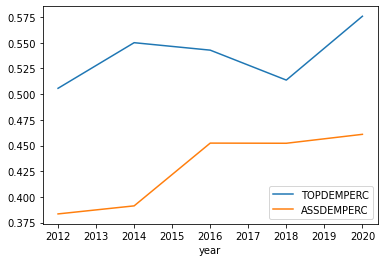

In [133]:
df_precincts_over_time["TOPDEMPERC"] = df_precincts_over_time.apply(determine_top_ballot_dem_perc, axis=1)
df_precincts_over_time["DIFFDEMPERC"] = df_precincts_over_time["TOPDEMPERC"] - df_precincts_over_time["ASSDEMPERC"]

sr_top_dem_perc = df_precincts_over_time.groupby("srprec")["TOPDEMPERC"].mean()

print((sr_top_dem_perc.idxmin(), sr_top_dem_perc.min()), (sr_top_dem_perc.idxmax(), sr_top_dem_perc.max()))

sr_dem_perc_diff = df_precincts_over_time.groupby("srprec")["DIFFDEMPERC"].mean()
print(sr_dem_perc_diff.mean())

# Plot the mean proportion of votes cast for deomcratic candidate vs repbulican, for both 
# the cycle's top-most ballot race, and the assembly district race, by precincts.
df_precincts_over_time.groupby("year")["TOPDEMPERC"].mean().plot.line(legend=True)
df_precincts_over_time.groupby("year")["ASSDEMPERC"].mean().plot.line(legend=True)

year
2012    AxesSubplot(0.125,0.125;0.775x0.755)
2014    AxesSubplot(0.125,0.125;0.775x0.755)
2016    AxesSubplot(0.125,0.125;0.775x0.755)
2018    AxesSubplot(0.125,0.125;0.775x0.755)
2020    AxesSubplot(0.125,0.125;0.775x0.755)
Name: DIFFDEMPERC, dtype: object

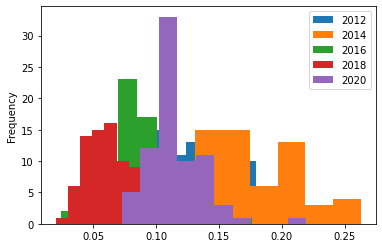

In [139]:
fig, axs = plt.subplots(1, 5, sharey=True)
for 
#df_precincts_over_time.groupby("year")["DIFFDEMPERC"].plot.hist(legend=True, stacked=True)

#### Exploring Precincts With Largest Split Ticket Voting 

In [124]:
# Find the precincts most likely to split their vote between top ballot and assembly vote. 
sr_split_tickets = df_precincts_over_time.groupby("srprec")["DIFFDEMPERC"].mean().sort_values(ascending=False)
split_ticket_ids = sr_split_tickets[:30].index.values

# Get the filtered precincts. 
df_split_ticket_precs = df_precincts_over_time[df_precincts_over_time["srprec"].isin(split_ticket_ids)]

df_split_ticket_precs_prop = df_split_ticket_precs

df_split_ticket_precs.groupby("srprec")[["dem","rep","aip","paf","msc","lib","nlp","grn","ref","dcl"]].mean()

,dem,rep,aip,paf,msc,lib,nlp,grn,ref,dcl
srprec,,,,,,,,,,
205,402.8,377.4,31.8,3.4,14.6,11.8,1.4,16.6,0.4,227.8
208,522.2,391.0,43.8,3.8,19.2,13.6,0.2,11.2,0.6,301.8
214,609.0,353.4,39.6,4.2,17.2,14.4,0.0,18.2,1.0,310.2
216,598.4,306.4,34.0,3.8,21.4,14.8,0.0,11.6,0.4,303.4
301,519.0,355.6,28.2,1.2,12.2,13.0,0.0,12.0,0.0,294.8
302,527.2,304.8,43.2,3.8,14.2,14.0,0.0,12.4,0.2,272.6
303,729.2,346.4,42.4,4.8,17.2,17.0,0.0,11.4,0.0,339.6
304,730.2,429.6,48.8,1.6,20.0,16.4,0.0,10.2,0.4,353.4
305,655.2,324.2,40.8,3.6,16.2,13.0,0.0,11.6,0.2,335.8
